# Activity: Build a K-means model 

## **Introduction**

K-means clustering is very effective when segmenting data and attempting to find patterns. Because clustering is used in a broad array of industries, becoming proficient in this process will help you expand your skillset in a widely applicable way.   

In this activity, you are a consultant for a scientific organization that works to support and sustain penguin colonies. You are tasked with helping other staff members learn more about penguins in order to achieve this mission. 

The data for this activity is in a spreadsheet that includes datapoints across a sample size of 345 penguins, such as species, island, and sex. Your will use a K-means clustering model to group this data and identify patterns that provide important insights about penguins.

**Note:** Because this lab uses a real dataset, this notebook will first require basic EDA, data cleaning, and other manipulations to prepare the data for modeling. 

## **Step 1: Imports** 


Import statements including `K-means`, `silhouette_score`, and `StandardScaler`.

In [177]:
# Import standard operational packages.
import numpy as np
import pandas as pd

# Important tools for modeling and evaluation.
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Import visualization packages.
import seaborn as sns
import matplotlib.pyplot as plt


`Pandas` is used to load the penguins dataset, which is built into the `seaborn` library. The resulting `pandas` DataFrame is saved in a variable named `penguins`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [113]:
# Save the `pandas` DataFrame in variable `penguins`. 
penguins = pd.read_csv("penguins.csv")

Now, review the first 10 rows of data.


In [114]:
# Review the first 10 rows.
penguins.head(n=10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


## **Step 2: Data exploration** 

After loading the dataset, the next step is to prepare the data to be suitable for clustering. This includes: 

*   Exploring data
*   Checking for missing values
*   Encoding data 
*   Dropping a column
*   Scaling the features using `StandardScaler`

### Explore data

To cluster penguins of multiple different species, determine how many different types of penguin species are in the dataset.

In [115]:
# Find out how many penguin types there are.
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [116]:
# Find the count of each species type.
penguins['species'].value_counts(dropna=False)

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

**Question:** How many types of species are present in the dataset?

**Answer:** There are three types of species present in the dataset: Adelie, Gentoo and Chinstrap. 

**Question:** Why is it helpful to determine the perfect number of clusters using K-means when you already know how many penguin species the dataset contains?

**Answer:** Even if we already know how many species there are in the dataset, it reamains possible that other features within the data such as sex or location, for example, will also influence how many distinct subgroups are within the data. Therefore, the optimal number of k-means should still be determined using inertia and silhouette scores. 

### Check for missing values

An assumption of K-means is that there are no missing values. Check for missing values in the rows of the data. 

In [117]:
# Check for missing values.
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Now, drop the rows with missing values and save the resulting pandas DataFrame in a variable named `penguins_subset`.

In [118]:
# Drop rows with missing values.
# Save DataFrame in variable `penguins_subset`.

penguins_subset = penguins.dropna(axis=0).reset_index(drop=True)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use `dropna`. Note that an axis parameter passed in to this function should be set to 0 if you want to drop rows containing missing values or 1 if you want to drop columns containing missing values. Optionally, `reset_index` may also be used to avoid a SettingWithCopy warning later in the notebook. 
</details>

Next, check to make sure that `penguins_subset` does not contain any missing values.

In [119]:
# Check for missing values.
penguins_subset.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Now, review the first 10 rows of the subset.

In [120]:
# View first 10 rows.
penguins_subset.head(n=10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
5,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
6,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
7,Adelie,Torgersen,41.1,17.6,182.0,3200.0,female
8,Adelie,Torgersen,38.6,21.2,191.0,3800.0,male
9,Adelie,Torgersen,34.6,21.1,198.0,4400.0,male


### Encode data

Some versions of the penguins dataset have values encoded in the sex column as 'Male' and 'Female' instead of 'MALE' and 'FEMALE'. The code below will make sure all values are ALL CAPS. 


In [121]:
penguins_subset['sex'] = penguins_subset['sex'].str.upper()
penguins_subset.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


K-means needs numeric columns for clustering. Convert the categorical column `'sex'` into numeric. There is no need to convert the `'species'` column because it isn't being used as a feature in the clustering algorithm. 

In [122]:
# Convert `sex` column from categorical to numeric.
from sklearn.preprocessing import OneHotEncoder
penguins_subset['sex'] = OneHotEncoder(drop='first').fit_transform(penguins_subset[['sex']]).toarray()
penguins_subset.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0.0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0.0
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1.0


### Drop a column

Drop the categorical column `island` from the dataset. While it has value, this notebook is trying to confirm if penguins of the same species exhibit different physical characteristics based on sex. This doesn't include location.

Note that the `'species'` column is not numeric. Don't drop the `'species'` column for now. It could potentially be used to help understand the clusters later. 

In [123]:
# Drop the island column.
penguins_subset.drop(columns='island', inplace=True)
penguins_subset

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,39.1,18.7,181.0,3750.0,1.0
1,Adelie,39.5,17.4,186.0,3800.0,0.0
2,Adelie,40.3,18.0,195.0,3250.0,0.0
3,Adelie,36.7,19.3,193.0,3450.0,0.0
4,Adelie,39.3,20.6,190.0,3650.0,1.0
...,...,...,...,...,...,...
328,Gentoo,47.2,13.7,214.0,4925.0,0.0
329,Gentoo,46.8,14.3,215.0,4850.0,0.0
330,Gentoo,50.4,15.7,222.0,5750.0,1.0
331,Gentoo,45.2,14.8,212.0,5200.0,0.0


### Scale the features

Because K-means uses distance between observations as its measure of similarity, it's important to scale the data before modeling. Use a third-party tool, such as scikit-learn's `StandardScaler` function. `StandardScaler` scales each point xᵢ by subtracting the mean observed value for that feature and dividing by the standard deviation:

x-scaled = (xᵢ – mean(X)) / σ

This ensures that all variables have a mean of 0 and variance/standard deviation of 1. 

**Note:** Because the species column isn't a feature, it doesn't need to be scaled. 

First, copy all the features except the `'species'` column to a DataFrame `X`. 

In [141]:
# Exclude `species` variable from X
X = penguins_subset.drop(columns='species', axis=1)
X.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1.0
1,39.5,17.4,186.0,3800.0,0.0
2,40.3,18.0,195.0,3250.0,0.0
3,36.7,19.3,193.0,3450.0,0.0
4,39.3,20.6,190.0,3650.0,1.0


Scale the features in `X` using `StandardScaler`, and assign the scaled data to a new variable `X_scaled`. 

In [146]:
#Scale the features.
#Assign the scaled data to variable `X_scaled`.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## **Step 3: Data modeling** 

Now, fit K-means and evaluate inertia for different values of k. Because you may not know how many clusters exist in the data, start by fitting K-means and examining the inertia values for different values of k. To do this, write a function called `kmeans_inertia` that takes in `num_clusters` and `x_vals` (`X_scaled`) and returns a list of each k-value's inertia.

When using K-means inside the function, set the `random_state` to `42`. This way, others can reproduce your results.

In [147]:
# Fit K-means and evaluate inertia for different values of k.
def kmeans_inertia(num_clusters, x_vals):
    ''' 
    Takes a list of cluster numbers to evaluate and data to produce a list of inertia scores for each selected number of clusters.

    Args: 
    num_clusters    (list)      - list of numbers of clusters to test
    x_vals          (array)     - array with features to cluster

    Output: 
    inertia         (list)      - list of inertia scores dermined for each
                                  cluster num
     '''
    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters= num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)
    return inertia

Use the `kmeans_inertia` function to return a list of inertia for k=2 to 10.

In [151]:
# Return a list of inertia for k=2 to 10.
num_clusters = [i for i in range (2, 11)]
num_clusters
inertia = kmeans_inertia(num_clusters, X_scaled)
inertia

[885.6224143652248,
 578.8284278107234,
 477.22956735281934,
 284.5464837898288,
 218.0515629783023,
 201.51585567445812,
 196.5890864581954,
 180.65751845628571,
 170.15703589755492]

Next, create a line plot that shows the relationship between `num_clusters` and `inertia`.
Use either seaborn or matplotlib to visualize this relationship. 

Text(0, 0.5, 'Inertia score')

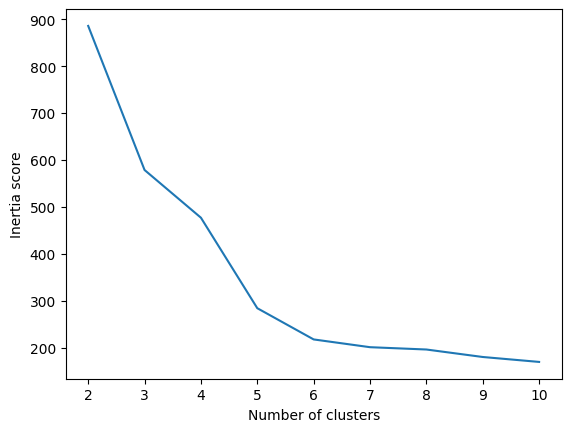

In [153]:
# Create a line plot.
plot = sns.lineplot(x=num_clusters, y=inertia)
plot.set_xlabel('Number of clusters')
plot.set_ylabel('Inertia score')


**Question:** Where is the elbow in the plot?

* **Answer:** The elbow in the plot is at $k=5$ or $k=6$.

## **Step 4: Results and evaluation** 

Now, evaluate the silhouette score using the `silhouette_score()` function. Silhouette scores are used to study the distance between clusters. 

Then, compare the silhouette score of each value of k, from 2 through 10. To do this, write a function called `kmeans_sil` that takes in `num_clusters` and `x_vals` (`X_scaled`) and returns a list of each k-value's silhouette score.

In [158]:
# Evaluate silhouette score.
# Write a function to return a list of each k-value's score.
def kmeans_sil(num_clusters, x_vals): 
    ''' 
    Takes a list of cluster numbers to evaluate and data to produce a list of silhouette scores for each k of clusters.

    Args: 
    num_clusters    (list)      - list of numbers of clusters to test
    x_vals          (array)     - array with features to cluster

    Output: 
    sil_scores      (list)      - list of silhouette scores dermined for each
                                  cluster num
     '''
    sil_scores = []
    for num in num_clusters:
        kms = KMeans(n_clusters= num, random_state=42)
        kms.fit(x_vals)
        sil_scores.append(silhouette_score(x_vals, kms.labels_))
    return sil_scores

sil_scores = kmeans_sil(num_clusters, X_scaled)

Next, create a line plot that shows the relationship between `num_clusters` and `sil_score`.
Use either seaborn or matplotlib to visualize this relationship. 

Text(0, 0.5, 'silhouette_score')

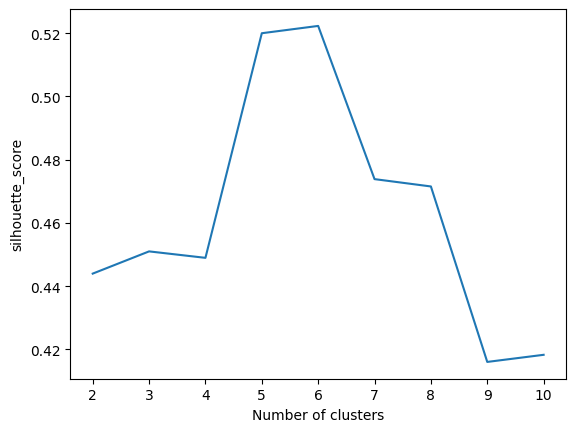

In [163]:
# Create a line plot.
plot = sns.lineplot(x=num_clusters, y=sil_scores)
plot.set_xlabel('Number of clusters')
plot.set_ylabel('silhouette_score')

**Question:** What does the graph show?

* **Answer:** The graph shows that the silhouette score is optimal (highest) for $k=6$, although $k=5$ is not that far off. 

### Optimal k-value

To decide on an optimal k-value, fit a six-cluster model to the dataset. 

In [164]:
# Fit a 6-cluster model.

kms6 = KMeans(n_clusters=6, random_state=42)
kms6.fit(X_scaled)

KMeans(n_clusters=6, random_state=42)

Print out the unique labels of the fit model.

In [167]:
# Print unique labels.
np.unique(kms6.labels_)

array([0, 1, 2, 3, 4, 5], dtype=int32)

Now, create a new column `cluster` that indicates cluster assignment in the DataFrame `penguins_subset`. It's important to understand the meaning of each cluster's labels, then decide whether the clustering makes sense. 

**Note:** This task is done using `penguins_subset` because it is often easier to interpret unscaled data.

In [168]:
# Create a new column `cluster`.
penguins_subset['cluster'] = kms6.labels_

Use `groupby` to verify if any `'cluster'` can be differentiated by `'species'`.

In [171]:
# Verify if any `cluster` can be differentiated by `species`.
# determine which species are present in each cluster
penguins_subset.groupby(by=['cluster', 'species']).size()

cluster  species  
0        Chinstrap    32
1        Gentoo       58
2        Adelie       73
         Chinstrap     2
3        Adelie        2
         Chinstrap    34
4        Gentoo       61
5        Adelie       71
dtype: int64

In [172]:
# Determine list all the clusters for which there is a species
penguins_subset.groupby(by =['species', 'cluster']).size()

species    cluster
Adelie     2          73
           3           2
           5          71
Chinstrap  0          32
           2           2
           3          34
Gentoo     1          58
           4          61
dtype: int64

Next, interpret the groupby outputs. Although the results of the groupby show that each `'cluster'` can be differentiated by `'species'`, it is useful to visualize these results. The graph shows that each `'cluster'` can be differentiated by `'species'`. 

**Note:** The code for the graph below is outside the scope of this lab. 

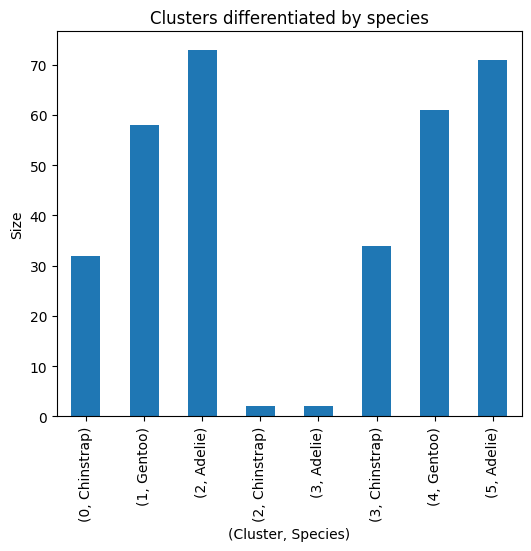

In [173]:
penguins_subset.groupby(by=['cluster', 'species']).size().plot.bar(title='Clusters differentiated by species', 
                                                                   figsize=(6, 5), ylabel='Size',
                                                                   xlabel='(Cluster, Species)');

Use `groupby` to verify if each `'cluster'` can be differentiated by `'species'` AND `'sex_MALE'`.

In [174]:
# Verify if each `cluster` can be differentiated by `species' AND `sex_MALE`.

penguins_subset.groupby(by =['cluster', 'species', 'sex']).size()

cluster  species    sex
0        Chinstrap  0.0    32
1        Gentoo     0.0    58
2        Adelie     0.0    73
         Chinstrap  0.0     2
3        Adelie     1.0     2
         Chinstrap  1.0    34
4        Gentoo     1.0    61
5        Adelie     1.0    71
dtype: int64

**Question:** Are the clusters differentiated by `'species'` and `'sex_MALE'`?

* **Answer:** Yes, they are. Clusters $0-2$ are all female while clusters $3-5$ are all male.

Finally, interpret the groupby outputs and visualize these results. The graph shows that each `'cluster'` can be differentiated by `'species'` and `'sex_MALE'`. Furthermore, each cluster is mostly comprised of one sex and one species. 

**Note:** The code for the graph below is outside the scope of this lab. 

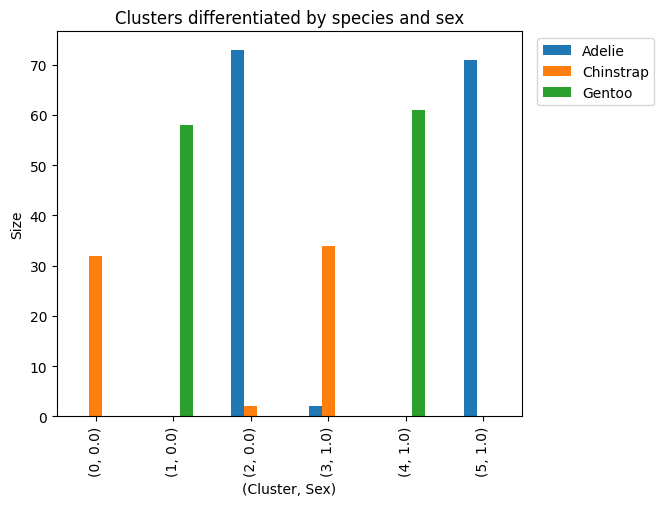

In [178]:
penguins_subset.groupby(by=['cluster','species','sex']).size().unstack(level = 'species', fill_value=0).plot.bar(title='Clusters differentiated by species and sex',
                                                                                                                      figsize=(6, 5),
                                                                                                                      ylabel='Size',
                                                                                                                      xlabel='(Cluster, Sex)')
plt.legend(bbox_to_anchor=(1.3, 1.0))

## **Considerations**


**What are some key takeaways that you learned during this lab? Consider the process you used, key tools, and the results of your investigation.**

[Write your response here. Double-click (or enter) to edit.]


**What summary would you provide to stakeholders?**

[Write your response here. Double-click (or enter) to edit.]





### References

[Gorman, Kristen B., et al. “Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis).” PLOS ONE, vol. 9, no. 3, Mar. 2014, p. e90081. PLoS Journals](https://doi.org/10.1371/journal.pone.0090081)

[Sklearn Preprocessing StandardScaler scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)